Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89320 entries, 0 to 89319
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   89320 non-null  object 
 1   AustralianPort          89320 non-null  object 
 2   ForeignPort             89320 non-null  object 
 3   Country                 89320 non-null  object 
 4   Passengers_In           89320 non-null  int64  
 5   Freight_In_(tonnes)     89320 non-null  float64
 6   Mail_In_(tonnes)        89320 non-null  float64
 7   Passengers_Out          89320 non-null  int64  
 8   Freight_Out_(tonnes)    89320 non-null  float64
 9   Mail_Out_(tonnes)       89320 non-null  float64
 10  Passengers_Total        89320 non-null  int64  
 11  Freight_Total_(tonnes)  89320 non-null  float64
 12  Mail_Total_(tonnes)     89320 non-null  float64
 13  Year                    89320 non-null  int64  
 14  Month_num               

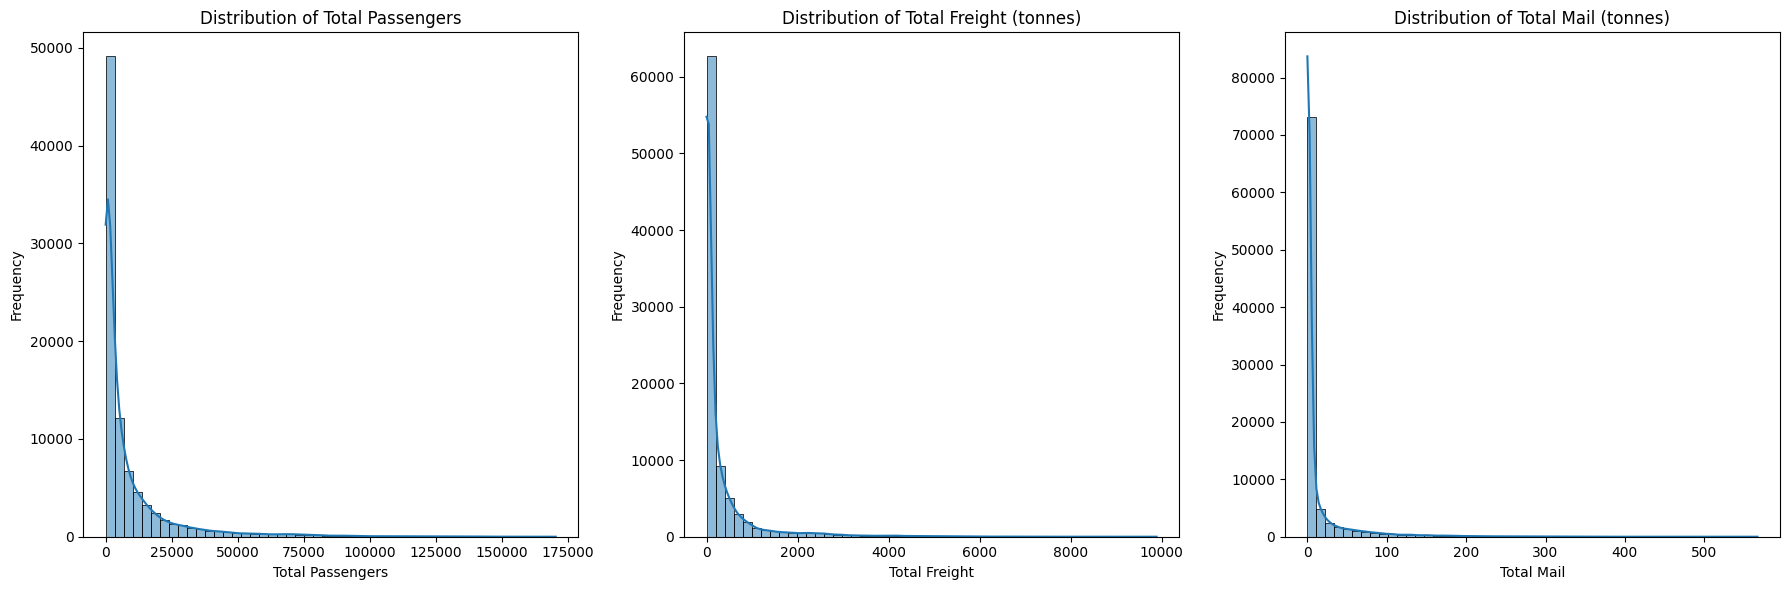

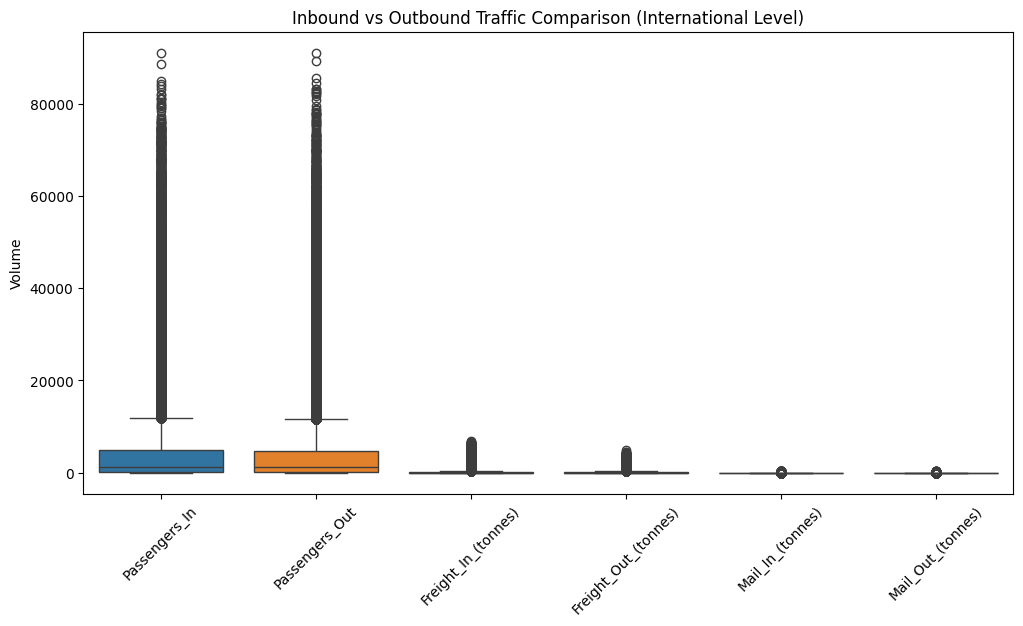

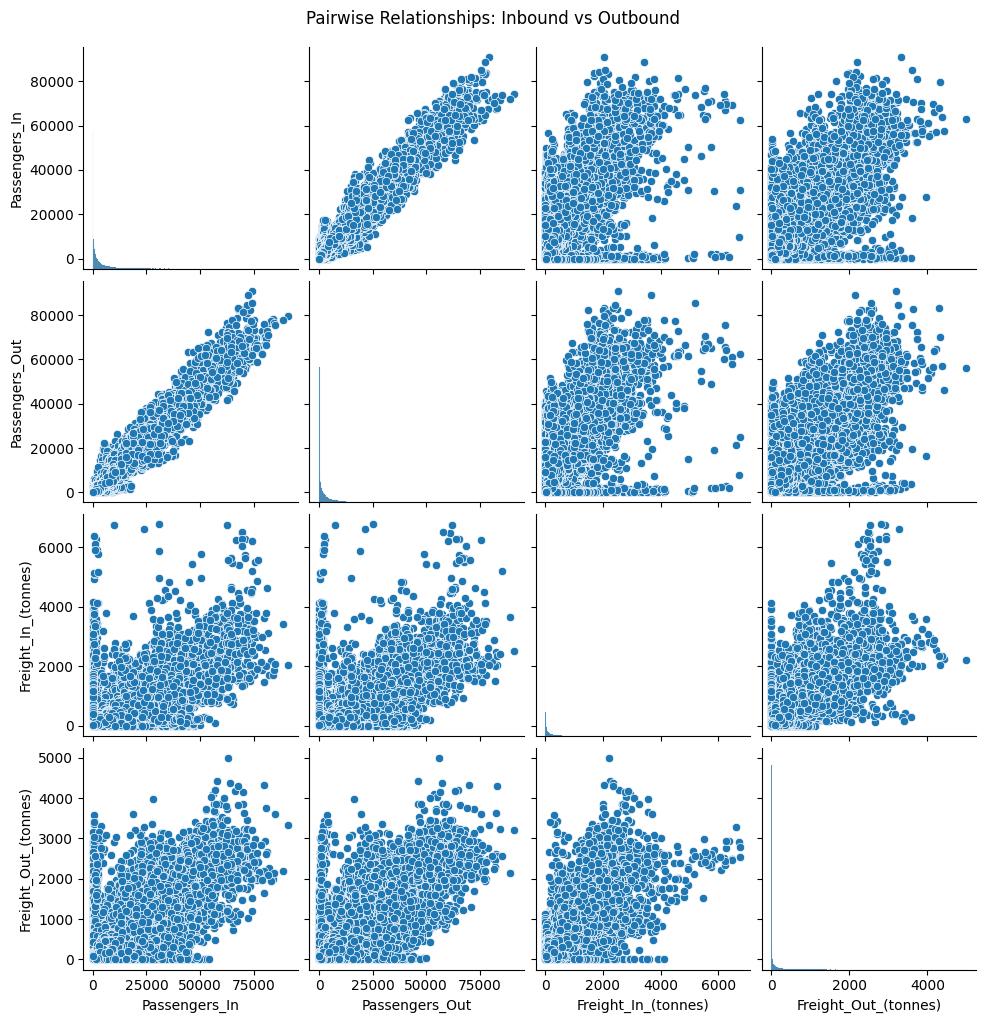

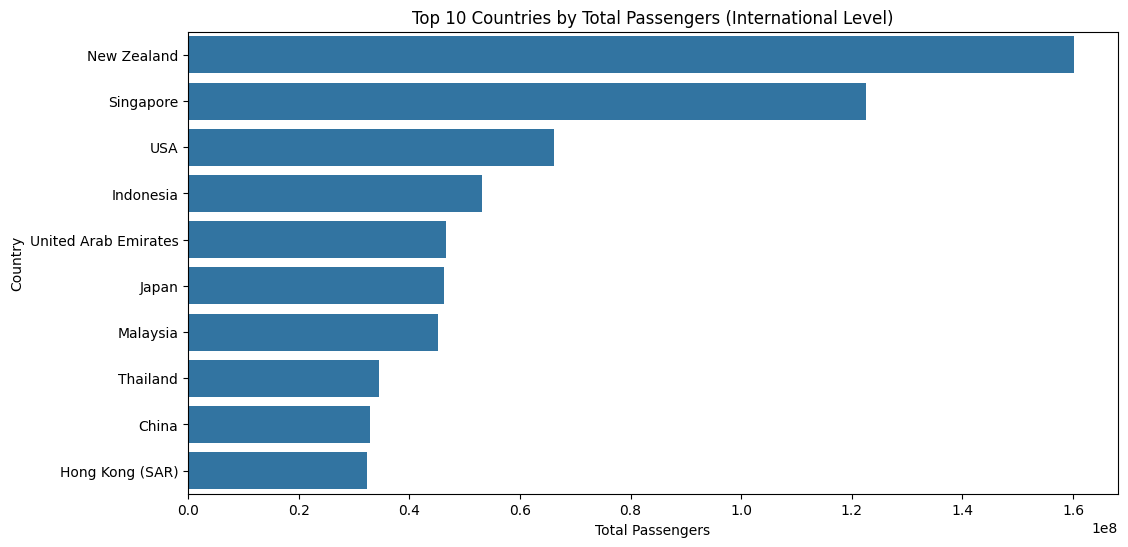

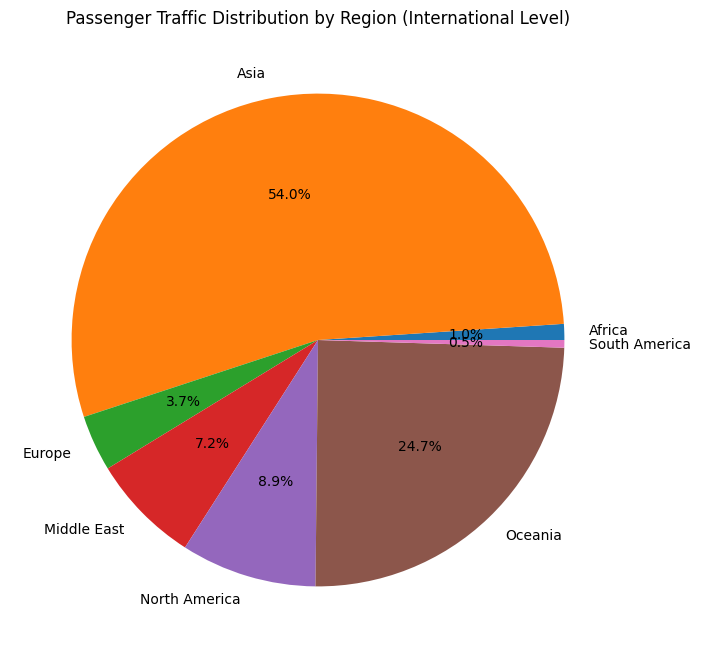

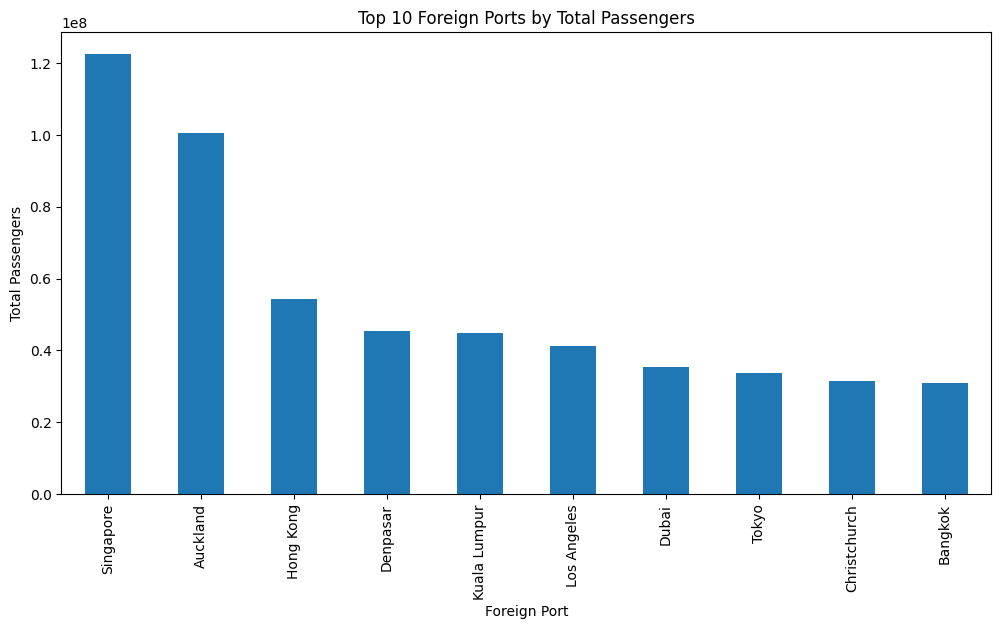

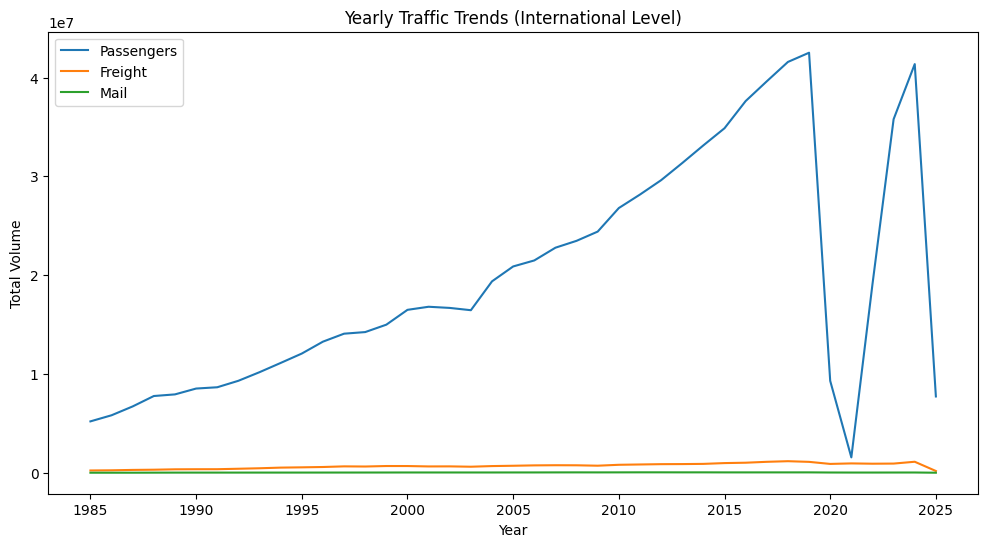

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('city_pairs.csv')

# Display basic information to verify data
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())

# Handle missing values by filling with 0 (assuming no traffic)
numeric_cols = ['Passengers_In', 'Freight_In_(tonnes)', 'Mail_In_(tonnes)',
                'Passengers_Out', 'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)',
                'Passengers_Total', 'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)']
df[numeric_cols] = df[numeric_cols].fillna(0)

# Convert Month and Year to datetime for time-series analysis
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_num'].astype(str) + '-01')

# Define regions for international-level analysis
region_map = {
    'New Zealand': 'Oceania',
    'New..Zealand': 'Oceania',  # Handle typo in dataset
    'Bahrain': 'Middle East',
    'India': 'Asia',
    'Germany': 'Europe',
    'UK': 'Europe',
    'Oman': 'Middle East',
    'Italy': 'Europe',
    'Singapore': 'Asia',
    'United Arab Emirates': 'Middle East',
    'Thailand': 'Asia',
    'Hong Kong': 'Asia',
    'Hong Kong (SAR)': 'Asia',
    'Solomon Islands': 'Oceania',
    'USA': 'North America',
    'Malaysia': 'Asia',
    'Philippines': 'Asia',
    'Fiji': 'Oceania',
    'New Caledonia': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Vanuatu': 'Oceania',
    'Japan': 'Asia',
    'Canada': 'North America',
    'Brunei': 'Asia',
    'Indonesia': 'Asia',
    'Netherlands': 'Europe',
    'Greece': 'Europe',
    'China': 'Asia',
    'Yugoslavia': 'Europe',
    'Sri Lanka': 'Asia',
    'Cyprus': 'Europe',
    'Mauritius': 'Africa',
    'Nauru': 'Oceania',
    'Tahiti': 'Oceania',
    'Zimbabwe': 'Africa',
    'South Africa': 'Africa',
    'Western Samoa': 'Oceania',
    'France': 'Europe',
    'Denmark': 'Europe',
    'Cook Islands': 'Oceania',
    'American Samoa': 'Oceania',
    'Austria': 'Europe',
    'Argentina': 'South America',
    'Guam': 'Oceania',
    'Malta': 'Europe',
    'Switzerland': 'Europe',
    'Korea': 'Asia',
    'Pakistan': 'Asia',
    'Tonga': 'Oceania',
    'Taiwan': 'Asia',
    'Wallis Island': 'Oceania',
    'Russia': 'Europe',
    'Belgium': 'Europe',
    'Lebanon': 'Middle East',
    'Vietnam': 'Asia',
    'Egypt': 'Middle East',
    'Chile': 'South America',
    'Luxembourg': 'Europe',
    'East Timor': 'Asia',
    'Niue': 'Oceania',
    'Ireland': 'Europe',
    'Macau': 'Asia',
    'Brazil': 'South America',
    'Kazakhstan': 'Asia',
    'Marshall Islands': 'Oceania',
    'Qatar': 'Middle East',
    'Kenya': 'Africa',
    'Nigeria': 'Africa',
    'Kiribati': 'Oceania',
    'Reunion': 'Africa',
    'Turkey': 'Europe',
    'Uruguay': 'South America',
    'Laos': 'Asia',
    'Peru': 'South America',
    'Cambodia': 'Asia',
    'Palau': 'Oceania',
    'Azerbaijan': 'Asia',
    'Botswana': 'Africa'
}
df['Region'] = df['Country'].map(region_map).fillna('Other')

# 1. Exploratory Data Analysis (EDA)

# 1.1 Distribution of traffic volumes (passengers, freight, mail)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Passengers_Total'], bins=50, kde=True)
plt.title('Distribution of Total Passengers')
plt.xlabel('Total Passengers')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['Freight_Total_(tonnes)'], bins=50, kde=True)
plt.title('Distribution of Total Freight (tonnes)')
plt.xlabel('Total Freight')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['Mail_Total_(tonnes)'], bins=50, kde=True)
plt.title('Distribution of Total Mail (tonnes)')
plt.xlabel('Total Mail')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 1.2 Inbound vs outbound comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Passengers_In', 'Passengers_Out', 'Freight_In_(tonnes)', 
                     'Freight_Out_(tonnes)', 'Mail_In_(tonnes)', 'Mail_Out_(tonnes)']])
plt.title('Inbound vs Outbound Traffic Comparison (International Level)')
plt.xticks(rotation=45)
plt.ylabel('Volume')
plt.show()

# Pairplot for correlations between inbound and outbound
sns.pairplot(df[['Passengers_In', 'Passengers_Out', 'Freight_In_(tonnes)', 'Freight_Out_(tonnes)']])
plt.suptitle('Pairwise Relationships: Inbound vs Outbound', y=1.02)
plt.show()

# 1.3 Regional or country-level traffic exploration
# Country-level: Top 10 countries by total passengers
country_agg = df.groupby('Country').agg({'Passengers_Total': 'sum'}).reset_index()
country_agg = country_agg.sort_values('Passengers_Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Passengers_Total', y='Country', data=country_agg)
plt.title('Top 10 Countries by Total Passengers (International Level)')
plt.xlabel('Total Passengers')
plt.ylabel('Country')
plt.show()

# Region-level: Passenger traffic distribution
region_agg = df.groupby('Region').agg({'Passengers_Total': 'sum'}).reset_index()
plt.figure(figsize=(8, 8))
plt.pie(region_agg['Passengers_Total'], labels=region_agg['Region'], autopct='%1.1f%%')
plt.title('Passenger Traffic Distribution by Region (International Level)')
plt.show()

# 1.4 Top ports and trends across years
# Top foreign ports by total passengers
top_ports = df.groupby('ForeignPort')['Passengers_Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_ports.plot(kind='bar')
plt.title('Top 10 Foreign Ports by Total Passengers')
plt.xlabel('Foreign Port')
plt.ylabel('Total Passengers')
plt.show()

# Trends across years
yearly_trends = df.groupby('Year').agg({
    'Passengers_Total': 'sum',
    'Freight_Total_(tonnes)': 'sum',
    'Mail_Total_(tonnes)': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Passengers_Total', data=yearly_trends, label='Passengers')
sns.lineplot(x='Year', y='Freight_Total_(tonnes)', data=yearly_trends, label='Freight')
sns.lineplot(x='Year', y='Mail_Total_(tonnes)', data=yearly_trends, label='Mail')
plt.title('Yearly Traffic Trends (International Level)')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.legend()
plt.show()

# Save processed data for further use
df.to_csv('processed_city_pairs_eda.csv', index=False)
